In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import scanpy as sc
import anndata as ad
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np


In [3]:
file = ''
adata = sc.read_visium(file, count_file=r'C:\Users\KARAN\Desktop\MultiOmics-Research\STAGATE\Landau\SPOTS Landau paper dataset\protein\GSE198353_mmtv_pymt_GEX_filtered_feature_bc_matrix.h5',load_images=True)
adata.var_names_make_unique()

In [4]:
pdata = pd.read_csv(r'C:\Users\KARAN\Desktop\MultiOmics-Research\STAGATE\Landau\SPOTS Landau paper dataset\protein\GSE198353_mmtv_pymt_ADT_t.csv', index_col=0)

In [5]:
pdata

,CD4,CD8a,CD366,CD279,CD117,Ly-6C,Ly-6G,CD19,CD45,CD25,...,CD11a,P2X7R,CD1d,Notch 4,CD31,Podoplanin,CD45R/B220,CD27,CD11b,CD202b
FIELD1,,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,478,583,877,446,57,0,481,434,3157,430,...,638,1222,1253,1273,1354,4858,656,1067,1193,587
AAACACCAATAACTGC-1,1504,1217,1731,943,64,2,1027,933,6580,872,...,1808,2240,1932,2253,3095,10214,1266,2040,3056,1000
AAACAGGGTCTATATT-1,1526,1231,1433,849,23,1,1322,1515,5964,1020,...,1778,2120,1971,2216,2927,2700,1437,2193,3863,985
AAACAGTGTTCCTGGG-1,847,787,1028,517,67,0,610,567,3476,579,...,939,1266,1242,1268,1742,4985,881,1230,1046,634
AAACATGGTGAGAGGA-1,2317,1770,2347,1475,58,1,1802,2371,7370,1333,...,2573,3359,2859,3335,4107,6983,2777,3766,4316,1723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGGCAATGACTG-1,1669,1378,1766,932,60,0,1070,957,6174,1022,...,1595,2025,1963,2319,2821,6929,1472,2130,1904,1053
TTGTTTCACATCCAGG-1,903,693,919,523,61,2,613,623,3531,526,...,917,1395,1224,1319,1623,9180,870,1226,1119,569
TTGTTTCATTAGTCTA-1,661,528,729,477,23,1,512,404,2571,465,...,714,984,952,1057,1242,4286,699,948,801,404


In [6]:
# Add protein data to AnnData object
adata.obsm['protein_data'] = pdata.values


In [7]:
adata.obsm['protein_data']

array([[ 478,  583,  877, ..., 1067, 1193,  587],
       [1504, 1217, 1731, ..., 2040, 3056, 1000],
       [1526, 1231, 1433, ..., 2193, 3863,  985],
       ...,
       [ 661,  528,  729, ...,  948,  801,  404],
       [1031,  857, 1250, ..., 1582, 3864,  652],
       [ 861,  720, 1080, ..., 1124, 1002,  492]], dtype=int64)

In [8]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics.cluster import adjusted_rand_score
import STAGATE



In [9]:
# Normalize and preprocess the data
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

------Calculating spatial graph...
The graph contains 22532 edges, 1978 cells.
11.3913 neighbors per cell on average.


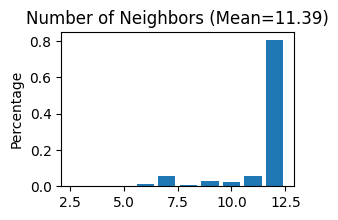

In [10]:

# Construct the spatial network
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
STAGATE.Stats_Spatial_Net(adata)


In [11]:
adata.obsm['protein_data'].shape

(1978, 32)

In [12]:

# Train the Arch1 model
from train_arch1 import train_arch1
from model import ArchModel

#gene_input_dim, protein_input_dim, gene_hidden_dim, protein_hidden_dim, latent_dim, spatial_dim
arch_model = ArchModel(gene_input_dim=32286,protein_input_dim= 32, gene_hidden_dim=256,protein_hidden_dim= 256, latent_dim=32, spatial_dim=64)
#'adata', 'gene_input_dim', 'protein_input_dim', 'gene_hidden_dim', 'protein_hidden_dim', 'latent_dim', 'spatial_dim', 'num_epochs', 'batch_size', and 'learning_rate'
trained_model = train_arch1(adata=adata,gene_input_dim=32286,protein_input_dim= 32, gene_hidden_dim=256,protein_hidden_dim= 256, latent_dim=32, spatial_dim=64, learning_rate=0.001, num_epochs=100,batch_size=16)

# Save the trained model
torch.save(trained_model.state_dict(), 'arch1_model.pth')


RuntimeError: shape '[-1, 64]' is invalid for input of size 32

In [ ]:

# Perform clustering and analysis
from utils1 import perform_clustering, visualize_results

# Perform clustering on the trained model
clustering_results = perform_clustering(trained_model, adata)

# Visualize the results
visualize_results(clustering_results, adata)